In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
 
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

In [2]:
diabetesDF = pd.read_csv("C:/dev/projects/alfs/chomp/src/Learning/NumpyLearn/diabetes.csv")
print(diabetesDF.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Make sure data is clean (doesn't contain null values)
diabetesDF.info() # output shown below
# For the model we will be using, (logistic regression),
# values of 0 automatically imply that the model will simply be ignoring these values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

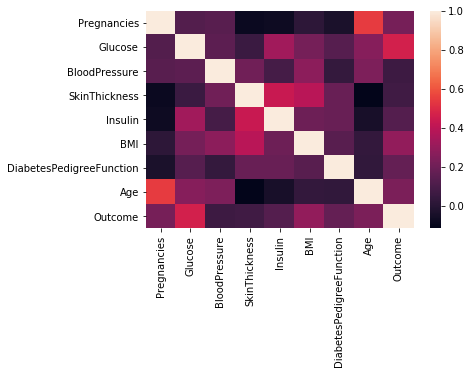

In [4]:
# correlation of every pair of features and visualize
corr = diabetesDF.corr()
print(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [5]:
# We'll use 650 records for training our model
# 100 records for testing 
# last 17 recrods to cross check our model

dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

In [6]:
# Seperate label and features
# Also conversion into NumPy arrays

# Label = final choice, output you get from the model

trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome', 1))

testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome', 1))

In [7]:
# Normalize inputs (mean 0 and std 1)
# Normalize test data using the mean/std from train data
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [8]:
# Using the machine learning model logistic regression
# Training process
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

# Using test data to find the accuracy of the model
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


In [12]:
# Save model
joblib.dump([diabetesCheck, means, stds], "C:/dev/projects/alfs/chomp/src/Learning/NumpyLearn/ML/diabeteseModel.pkl")

['C:/dev/projects/alfs/chomp/src/Learning/NumpyLearn/ML/diabeteseModel.pkl']

In [14]:
# Checking accuracy again, this time using our saved model
diabetesLoadedModel, means, stds = joblib.load("C:/dev/projects/alfs/chomp/src/Learning/NumpyLearn/ML/diabeteseModel.pkl")
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


In [15]:
# Now using unused data to see predictions being made
# Unused data:
print(dfCheck.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
750            4      136             70              0        0  31.2   
751            1      121             78             39       74  39.0   
752            3      108             62             24        0  26.0   
753            0      181             88             44      510  43.3   
754            8      154             78             32        0  32.4   

     DiabetesPedigreeFunction  Age  Outcome  
750                     1.182   22        1  
751                     0.261   28        0  
752                     0.223   25        0  
753                     0.222   26        1  
754                     0.443   45        1  


In [16]:
# Everything from sampleData but last column 'Output' (label)
sampleData = dfCheck[:1]
 
# prepare sample (nomralized)
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
 
# predict 
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

# predictionProbability: [[% of class being 0 % of class being 1]] 

Probability: [[0.4385153 0.5614847]]
prediction: [1]


In [ ]:
"""
Ways to improve model:
- Feature bucketing
    eg new variable for blood pressure in a particular range
- Data cleaning
    replacing 0 values with the mean value
- Research into what metrics doctors rely on the most to diagnose patients
    create new features accordingly
"""